<a href="https://colab.research.google.com/github/A01793509/Equipo_44/blob/main/Avance5_44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 **Avance 5. Modelo final**: Mejorar significativamente el rendimiento al aprovechar las fortalezas de diferentes modelos y reducir sus debilidades.Evaluar la calidad de las predicciones del modelo en datos no vistos.

📑 **Asignatura**: Proyecto Integrador

📘 **Proyecto**: LunchForecast AI: Optimizador de reservas de almuerzos empresariales basado en inteligencia artificial.

📚 **Equipo**: 44

🧑 **Alumnos**:

Alberto José García Porras (Matrícula No. **A01793509**)

Erick Johan Najera Olivero (Matrícula No. **A01793506**)

Carlos Julio León Caicedo (Matrícula No. **A01793947**)

👩 **Profesores**:

Dra. Grettel Barceló Alonso

Dr. Luis Eduardo Falcón Morales

Dr. Guillermo Mota

📅 Junio 2 del 2024

In [181]:
#!pip install scikeras

In [182]:
#Importamos las librerías que utilizaremos para la ejecución de la actividad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math
import numpy as np
import warnings
import statsmodels.api as sm
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
#from scikeras.wrappers import KerasRegressor

👣**Obtener Datos**: Cargamos el archivo CSV con la información del consumo del casino desde enero del 2021 hasta marzo del 2024.

In [183]:
dfCasinoConsumo = pd.read_csv("DatosConsumoCasino.csv",sep=";")
dfCasinoConsumoOriginal = dfCasinoConsumo
dfCasinoConsumo.head()

,Consecutivo,IdProducto,cod lector,Cod comedor,Identificacion persona,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado,Nivel,Porcentaje apoyo,Invitado,Ing x planta
0,825979,2.0,0,1001,100001,2021-01-03,ALMUERZO,3486,Operativo,OPER,0,0,1
1,825980,2.0,0,1001,100002,2021-01-03,ALMUERZO,3486,Administrativo,ANAL,90,0,1
2,825981,2.0,0,1001,100003,2021-01-03,ALMUERZO,3486,Operativo,OPER,0,0,1
3,825982,2.0,1,1001,100004,2021-01-03,ALMUERZO,3486,Operativo,OPER,90,0,1
4,825983,2.0,0,1001,100005,2021-01-03,ALMUERZO,3486,Administrativo,OPER,0,0,1



---

☝**NOTA:** En este entregable iniciaremos aplicando los ajustes detectados en los entregables anteriores, referentes a la depuración de los datos y la ingeniería de características.


---




---


👣 **SECCIÓN 1:** Limpieza y ajuste del conjunto de datos.



---



In [184]:
# Convierte la columna 'fecha del consumo' a tipo datetime si aún no lo está
dfCasinoConsumo['Fecha Consumo'] = pd.to_datetime(dfCasinoConsumo['Fecha Consumo'], format='%Y-%m-%d', errors='coerce')
#dfCasinoConsumo = dfCasinoConsumo.set_index('Fecha Consumo')
dfCasinoConsumo.head()

,Consecutivo,IdProducto,cod lector,Cod comedor,Identificacion persona,Fecha Consumo,Detalle,Nro empleados,Tipo Empleado,Nivel,Porcentaje apoyo,Invitado,Ing x planta
0,825979,2.0,0,1001,100001,2021-01-03,ALMUERZO,3486,Operativo,OPER,0,0,1
1,825980,2.0,0,1001,100002,2021-01-03,ALMUERZO,3486,Administrativo,ANAL,90,0,1
2,825981,2.0,0,1001,100003,2021-01-03,ALMUERZO,3486,Operativo,OPER,0,0,1
3,825982,2.0,1,1001,100004,2021-01-03,ALMUERZO,3486,Operativo,OPER,90,0,1
4,825983,2.0,0,1001,100005,2021-01-03,ALMUERZO,3486,Administrativo,OPER,0,0,1


In [185]:
#En el análisis, habíamos notado que existían valores de 'ALMUERZO' en minúsculas en el campo 'DETALLE'
#Por lo anterior, procederemos a pasar a mayúsculas el contenido de la columna antes de proceder con el borrado
dfCasinoConsumo['Detalle'] = dfCasinoConsumo['Detalle'].str.upper()

#Filtramos el dataFrame para conservar solo las filas donde 'DETALLE' es igual a 'ALMUERZO' y lo guardamos en un
#nuevo dataframe para evitar SettingWithCopyWarning
dfCasinoAlmuerzos = dfCasinoConsumo[dfCasinoConsumo['Detalle'] == 'ALMUERZO'].copy()

In [186]:
#Eliminamos las columnas que no consideramos relevantes según hallazgos en la fase de exploración
dfCasinoConsumo=dfCasinoConsumo.drop(columns=['Consecutivo', 'Detalle','IdProducto', 'cod lector', 'Cod comedor', 'Identificacion persona', 'Invitado','Ing x planta','Nro empleados','Nivel'])
dfCasinoConsumo.head()

,Fecha Consumo,Tipo Empleado,Porcentaje apoyo
0,2021-01-03,Operativo,0
1,2021-01-03,Administrativo,90
2,2021-01-03,Operativo,0
3,2021-01-03,Operativo,90
4,2021-01-03,Administrativo,0


**pd.get_dummies():** Esta función se utilizó para convertir las variables categóricas Tipo Empleado y Porcentaje apoyo en un conjunto de variables indicadoras (también llamadas variables dummy). Es una técnica comúnmente usada en la preparación de datos para modelos de aprendizaje automático, particularmente útil cuando se trata con modelos que requieren entradas numéricas exclusivamente.

In [187]:
#Procedemos a realizar la codificación de las columnas categóricas
dfCasinoAlmuerzosCodificado = pd.get_dummies(dfCasinoConsumo, columns=['Tipo Empleado',  'Porcentaje apoyo'])
dfCasinoAlmuerzosCodificado.head()

,Fecha Consumo,Tipo Empleado_Administrativo,Tipo Empleado_Aprendices,Tipo Empleado_Operativo,Porcentaje apoyo_0,Porcentaje apoyo_30,Porcentaje apoyo_90,Porcentaje apoyo_100
0,2021-01-03,False,False,True,True,False,False,False
1,2021-01-03,True,False,False,False,False,True,False
2,2021-01-03,False,False,True,True,False,False,False
3,2021-01-03,False,False,True,False,False,True,False
4,2021-01-03,True,False,False,True,False,False,False


In [188]:
#Para que el modelo que desarrollaremos más adelante funcione de una mejor manera,
#procederemos a convertir los valores booleanos a números.
#Recorremos todas las columnas y al identificar una booleana, la convertiremos en número.
for col in dfCasinoAlmuerzosCodificado.columns:
    if dfCasinoAlmuerzosCodificado[col].dtype == bool:
        dfCasinoAlmuerzosCodificado[col] = dfCasinoAlmuerzosCodificado[col].astype(int)

dfCasinoAlmuerzosCodificado.head(5)

,Fecha Consumo,Tipo Empleado_Administrativo,Tipo Empleado_Aprendices,Tipo Empleado_Operativo,Porcentaje apoyo_0,Porcentaje apoyo_30,Porcentaje apoyo_90,Porcentaje apoyo_100
0,2021-01-03,0,0,1,1,0,0,0
1,2021-01-03,1,0,0,0,0,1,0
2,2021-01-03,0,0,1,1,0,0,0
3,2021-01-03,0,0,1,0,0,1,0
4,2021-01-03,1,0,0,1,0,0,0


In [189]:
dfCasinoAlmuerzosCodificado

,Fecha Consumo,Tipo Empleado_Administrativo,Tipo Empleado_Aprendices,Tipo Empleado_Operativo,Porcentaje apoyo_0,Porcentaje apoyo_30,Porcentaje apoyo_90,Porcentaje apoyo_100
0,2021-01-03,0,0,1,1,0,0,0
1,2021-01-03,1,0,0,0,0,1,0
2,2021-01-03,0,0,1,1,0,0,0
3,2021-01-03,0,0,1,0,0,1,0
4,2021-01-03,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
884610,2024-03-21,0,0,1,0,0,1,0
884611,2024-03-22,0,0,1,0,0,1,0
884612,2024-03-23,0,0,1,0,0,1,0
884613,2024-03-26,0,0,1,0,0,1,0


In [190]:
# Agrupar por 'Fecha' y realizar las agregaciones necesarias para olumnas codificadas como dummies con la función agg()
dfAlmuerzoAgrupado = dfCasinoAlmuerzosCodificado.groupby('Fecha Consumo').agg({
    'Tipo Empleado_Administrativo': 'sum',
    'Tipo Empleado_Aprendices': 'sum',
    'Tipo Empleado_Operativo': 'sum',
    'Porcentaje apoyo_0': 'sum',
    'Porcentaje apoyo_30': 'sum',
    'Porcentaje apoyo_90': 'sum',
    'Porcentaje apoyo_100': 'sum'
}).reset_index()

In [191]:
# Agregar una nueva columna con el conteo de registros por fecha
dfAlmuerzoAgrupado['Cantidad Almuerzos'] = dfCasinoAlmuerzosCodificado.groupby('Fecha Consumo').size().values

In [192]:
# Convertir fechas a formato datetime
dfAlmuerzoAgrupado['Fecha Consumo'] = pd.to_datetime(dfAlmuerzoAgrupado['Fecha Consumo'])

# Nos aseguramos de que el DataFrame esté ordenado por fecha para que cualquier operación
# o visualización a realizar con los datos siga el orden cronológico correcto.
dfAlmuerzoAgrupado = dfAlmuerzoAgrupado.sort_values('Fecha Consumo')

# Configurar la fecha como el índice
dfAlmuerzoAgrupado.set_index('Fecha Consumo', inplace=True)
dfAlmuerzoAgrupado.index

DatetimeIndex(['2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10',
               '2021-01-11', '2021-01-12',
               ...
               '2024-03-22', '2024-03-23', '2024-03-24', '2024-03-25',
               '2024-03-26', '2024-03-27', '2024-03-28', '2024-03-29',
               '2024-03-30', '2024-03-31'],
              dtype='datetime64[ns]', name='Fecha Consumo', length=1181, freq=None)

In [193]:
fecha_inicio = dfAlmuerzoAgrupado.index.min()
fecha_fin = dfAlmuerzoAgrupado.index.max()
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')
# Reindexar el DataFrame
dfAlmuerzoAgrupado = dfAlmuerzoAgrupado.reindex(rango_fechas)

dfAlmuerzoAgrupado.fillna(0,inplace=True)

# Seleccionar el valor de una columna específica en una fecha específica usando at
# Especifica la fecha que deseas filtrar
fecha_especifica = '2022-01-01'

# Convertir la fecha específica a tipo datetime
fecha_especifica = pd.to_datetime(fecha_especifica)

# Filtrar el DataFrame para la fecha específica
try:
    registro_filtrado = dfAlmuerzoAgrupado.loc[fecha_especifica]
    print(f"Registro para la fecha {fecha_especifica.date()}:\n{registro_filtrado}")
except KeyError:
    print(f"No hay registros para la fecha {fecha_especifica.date()}")

dfAlmuerzoAgrupado.info()


Registro para la fecha 2022-01-01:
Tipo Empleado_Administrativo    0.0
Tipo Empleado_Aprendices        0.0
Tipo Empleado_Operativo         0.0
Porcentaje apoyo_0              0.0
Porcentaje apoyo_30             0.0
Porcentaje apoyo_90             0.0
Porcentaje apoyo_100            0.0
Cantidad Almuerzos              0.0
Name: 2022-01-01 00:00:00, dtype: float64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1184 entries, 2021-01-03 to 2024-03-31
Freq: D
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tipo Empleado_Administrativo  1184 non-null   float64
 1   Tipo Empleado_Aprendices      1184 non-null   float64
 2   Tipo Empleado_Operativo       1184 non-null   float64
 3   Porcentaje apoyo_0            1184 non-null   float64
 4   Porcentaje apoyo_30           1184 non-null   float64
 5   Porcentaje apoyo_90           1184 non-null   float64
 6   Porcentaje apoyo_100      

In [194]:
# Variable endógena (consumo)
dfendog = dfAlmuerzoAgrupado['Cantidad Almuerzos']

# Variables exógenas
dfexog = dfAlmuerzoAgrupado[['Tipo Empleado_Aprendices', 'Tipo Empleado_Operativo','Tipo Empleado_Administrativo']]

In [195]:
# Dividir en conjuntos de entrenamiento y prueba
train_size = int(len(dfAlmuerzoAgrupado) * 0.8)
train_endog1 = dfendog[:train_size]
test_endog1 = dfendog[train_size:]

train_exog = dfexog[:train_size]
test_exog = dfexog[train_size:]

In [196]:
train_endog = train_endog1.to_frame()
test_endog = test_endog1.to_frame()


---


# 🔖 **Rúbrica - Criterio: Ensambles**


---



---

📚 Basados en la investigación realizada referente a los modelos recomendados para la predicción de la variable objetivo en función de un conjunto de datos con componentes estacionales y variables exógenas, y la priorización de los dos modelos de aprendizaje automático que evidenciarón los mejores resultados en la evaluación de las metrícas de calidad realizadas en el ejericio anterior (Avance 3. Baseline), se realiz entonces este ejercicio con los siguientes modelos.

* SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)
* SVM (Support Vector Machines)

De igual forma, utilizaremos el dataframe '**dfmetricas**' para almacenar los rendimientos de las métricas clave de cada modelo y se generan al menos cuatro modelos, cubriendo ambas estrategias de ensamble: homogéneas y heterogéneas. Se utilizan los mejores modelos individuales, obtenidos de la fase previa, para el stacking y/o blending.

---

In [197]:
#Creamos el dataframe para almacenar las diferentes metricas calculadas para cada uno de los 6 modelos
data  = {'Modelo': ['SARIMAX','ARIMA','REGRESIÓN LINEAL','ARBOL DE REGRESIÓN','REDES NEURONALES','SVM'],'Metrica 1': ['WMAE','MAE','MSE','MSE','MBE','MAE'],'Valor 1':[0,0,0,0,0,0],'Metrica 2': ['MBE','MAPE','R2','R2','LOSS','WMAE'],'Valor 2':[0,0,0,0,0,0] }
dfmetricas = pd.DataFrame(data)
print("*******************************************************************************")
print("Esta será nuestra tabla comparativa para evaluar el rendimiento de los modelos:")
print("*******************************************************************************")

dfmetricas

*******************************************************************************
Esta será nuestra tabla comparativa para evaluar el rendimiento de los modelos:
*******************************************************************************


,Modelo,Metrica 1,Valor 1,Metrica 2,Valor 2
0,SARIMAX,WMAE,0,MBE,0
1,ARIMA,MAE,0,MAPE,0
2,REGRESIÓN LINEAL,MSE,0,R2,0
3,ARBOL DE REGRESIÓN,MSE,0,R2,0
4,REDES NEURONALES,MBE,0,LOSS,0
5,SVM,MAE,0,WMAE,0




---


👣**Creación de Modelos**: Iniciamos con la creación y ejecución de los modelos mencionados.

🦾 **Modelo 1: SARIMAX**


---



In [198]:
#Definimos los parámetros a utilizar en SARIMAX siguiendo los hallazgos de los entregables anteriores
p, d, q = 1, 2, 1
#P, D, Q, s = 1, 1, 1, 12 #Estos serán nuestros parámetros estacionales
P, D, Q, s = 1, 1, 1, 7 #Estos serán nuestros parámetros estacionales

#Entrenamos el modelo
Modelo_SARIMAX = sm.tsa.SARIMAX(train_endog, exog=train_exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
Resultados_SARIMAX = Modelo_SARIMAX.fit()

#Observamos los datos de resumen del modelo
print(Resultados_SARIMAX.summary())

                                     SARIMAX Results                                     
Dep. Variable:                Cantidad Almuerzos   No. Observations:                  947
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 7)   Log Likelihood                 110.625
Date:                           Sat, 01 Jun 2024   AIC                           -205.250
Time:                                   23:24:19   BIC                           -166.500
Sample:                               01-03-2021   HQIC                          -190.477
                                    - 08-07-2023                                         
Covariance Type:                             opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Tipo Empleado_Aprendices         1.0000   1.78e-08   5.63e+07      0.000       1.000  

In [199]:
#Definimos el rango de fechas en nuestro conjunto de pruebas para la predicción con el modelo
Fecha_Inicio = test_endog.index[0]  #Fecha desde
Fecha_Fin =  test_endog.index[-1]  #Fecha hasta

In [200]:
#Realizamos las predicciones
Prediccion_SARIMAX = Resultados_SARIMAX.get_prediction(start=Fecha_Inicio, end=Fecha_Fin, exog=test_exog)
Prediccion_Final_SARIMAX = Prediccion_SARIMAX.predicted_mean

# Convertir test_endog a una Serie
test_endog_series = test_endog.squeeze()

# Calcular los residuos para SARIMAX
residuos_sarimax = test_endog_series - Prediccion_Final_SARIMAX


#Definimos los intervalos de confianza
Prediccion_CI_SARIMAX = Prediccion_SARIMAX.conf_int()

In [201]:
#Visualizamos las predicciones generadas con el modelo SARIMAX, para ello creamos un dataframe comparando
#las predicciones con los datos reales.
dfComparativoPredSARIMAX = pd.concat([test_endog, Prediccion_Final_SARIMAX], axis=1)
dfComparativoPredSARIMAX.columns = ['Real', 'Predicción']
print("******************************************************")
print("Las predicciones generadas con el modelo SARIMAX son:")
print("******************************************************")
dfComparativoPredSARIMAX

******************************************************
Las predicciones generadas con el modelo SARIMAX son:
******************************************************


,Real,Predicción
2023-08-08,866.0,865.999993
2023-08-09,897.0,896.999993
2023-08-10,901.0,900.999993
2023-08-11,810.0,809.999993
2023-08-12,588.0,587.999993
...,...,...
2024-03-27,1173.0,1172.999990
2024-03-28,672.0,671.999990
2024-03-29,612.0,611.999989
2024-03-30,593.0,592.999989


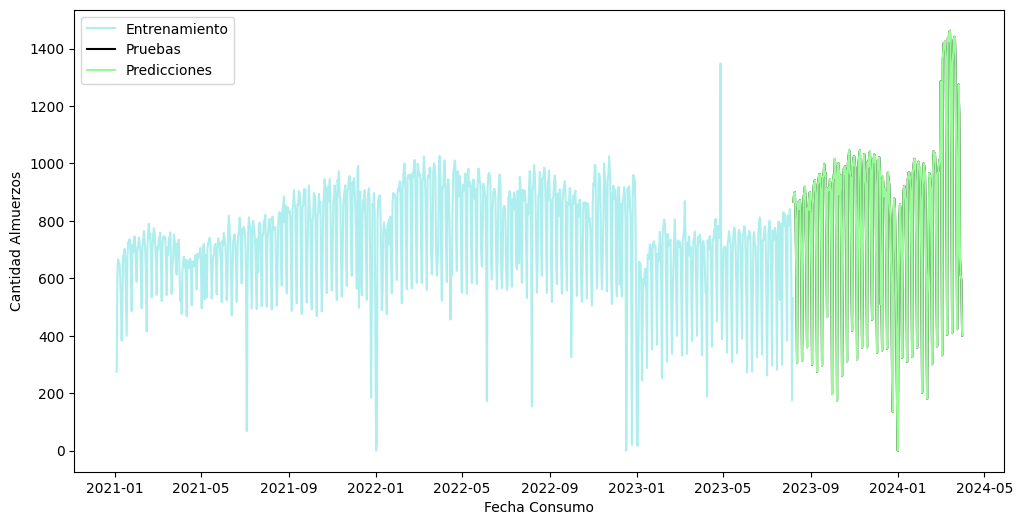

In [202]:
#Graficamos las predicciones para realizar un análisis visual
plt.figure(figsize=(12, 6))
plt.plot(train_endog, label='Entrenamiento', color='paleturquoise')
plt.plot(test_endog, label='Pruebas', color='black')
plt.plot(Prediccion_Final_SARIMAX, label='Predicciones', color='palegreen')
plt.fill_between(Prediccion_CI_SARIMAX.index, Prediccion_CI_SARIMAX.iloc[:, 0], Prediccion_CI_SARIMAX.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Fecha Consumo')
plt.ylabel('Cantidad Almuerzos')
plt.legend()
plt.show()

---

🔢**Métricas:** calcularemos a continuación las diferentes métricas recomendadas para el modelo SARIMAX. Sin embargo, nos enfocaremos en las métricas MBE y WMAE definidas en nuestro entregable anterior como parámetros propuesto para afinamiento del modelo.

---

In [203]:
#Calculamos MAE y RMSE
MAE = mean_absolute_error(test_endog, Prediccion_Final_SARIMAX)
RMSE = np.sqrt(mean_squared_error(test_endog, Prediccion_Final_SARIMAX))

#Calculamos MBE
mbe = (Prediccion_Final_SARIMAX - test_endog['Cantidad Almuerzos']).mean()

#Calculamos WMAE
errors = Prediccion_Final_SARIMAX - test_endog['Cantidad Almuerzos'].mean()
Pesos = np.where(errors > 0, 1, 2)
#Pesos =  np.ones_like(test_endog['Cantidad Almuerzos'])
absolute_errors = np.abs(Prediccion_Final_SARIMAX - test_endog['Cantidad Almuerzos'])
wmae = np.sum(Pesos * np.abs(errors)) / np.sum(Pesos)
#wmae = np.sum(Pesos * absolute_errors) / np.sum(Pesos)

print(f'**********************************************')
print(f'Métricas para el modelo SARIMAX (statsmodels):')
print(f'**********************************************')
print(f'MAE: {MAE}')
print(f'RMSE: {RMSE}')
print(f'MBE: {mbe}')
print(f'WMAE: {wmae}')


**********************************************
Métricas para el modelo SARIMAX (statsmodels):
**********************************************
MAE: 8.497550149296648e-06
RMSE: 8.573552674393166e-06
MBE: -8.497550149296648e-06
WMAE: 259.85270450967397


In [204]:
#Actualizamos las metricas obtenidas del modelo 1 en el dataframe
dfmetricas.at[0,'Valor 1'] = wmae
dfmetricas.at[0,'Valor 2'] = mbe

---


🦾 **Modelo 6: SUPPORT VECTOR MACHINE (SVM)**


---

In [205]:
#Antes de iniciar con nuestro modelo SVM preparamos los datos
dfAlmuerzoAgrupado1 = dfAlmuerzoAgrupado

#Separamos las variables exógenas (X) de la endógena (y)
X = dfAlmuerzoAgrupado1[['Tipo Empleado_Administrativo', 'Tipo Empleado_Aprendices', 'Tipo Empleado_Operativo','Porcentaje apoyo_0','Porcentaje apoyo_30','Porcentaje apoyo_90','Porcentaje apoyo_100']]
y = dfAlmuerzoAgrupado1['Cantidad Almuerzos']

#Dividimos nuestros datos en entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
#Ahora vamos a crear un pipeline para escalar los datos y entrenar así el modelo SVM
pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1))

#Entrenamos el modelo con los datos de entrenamiento
pipeline.fit(X_train, y_train)

#Realizamos las predicciones con los datos de prueba
Predicciones_SVM = pipeline.predict(X_test)

# Calcular los residuos para SVM
residuos_svm = y_test - Predicciones_SVM

#Visualizamos las predicciones de nuestro modelo SVM
print("*************************************************")
print("Las predicciones generadas con el modelo SVM son:")
print("*************************************************")
Predicciones_SVM

*************************************************
Las predicciones generadas con el modelo SVM son:
*************************************************


array([ 908.1212929 ,  872.80912402,  613.66343547,  701.02228932,
        996.52656515,  978.04630414,  629.62075522,  538.62041687,
        905.48509759,  828.73137137,  771.57785892,  157.26936495,
        663.40911762,  135.64835427,  809.71442562,  747.91462006,
        800.13230545,  876.66428724,  727.88321812,  514.11011979,
        907.70648486,  621.12465489,  651.86996511,  787.11887666,
        575.25099339,  867.92859911,  879.07673093,  530.30759789,
        517.25606465,  815.33077481,  691.08017167,  697.93616518,
        976.74657377,  896.16525402,  866.38105822,  691.09537963,
        363.29686861,  970.98147412,  887.73570948,  946.78503533,
        841.22270242,  548.24119006,  940.63632728,  911.00824413,
        909.76313417,  533.7102586 ,  888.42156618,  962.35980413,
        542.8736136 ,  548.66010438,  724.88986066,  550.70751642,
        848.8816008 ,  771.95702216,  821.06290957,  685.99555025,
       1006.36628204,  543.67367717,  710.80242416,  762.85651

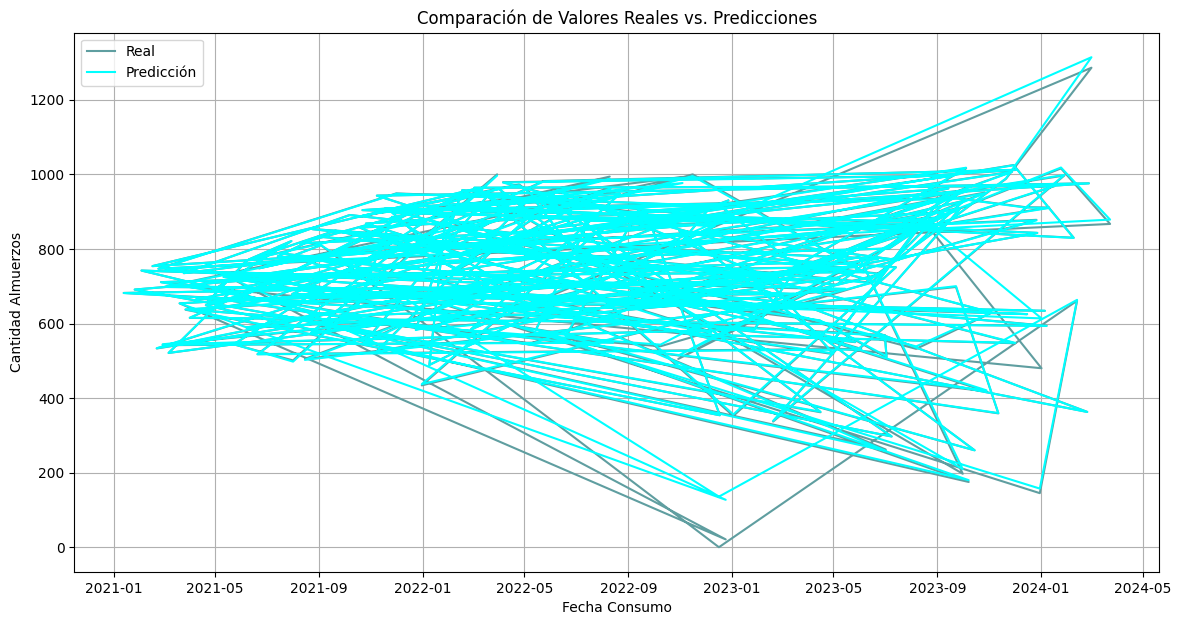

In [207]:
#Graficamos las predicciones para realizar un análisis visual, pero antes
#crearemos un dataframe para facilitar la visualización.
Resultados_SVM = pd.DataFrame({'Valores Reales': y_test, 'Predicciones': Predicciones_SVM}, index=y_test.index)

# Graficamos los valores reales versus las predicciones
plt.figure(figsize=(14, 7))
plt.plot(Resultados_SVM.index, Resultados_SVM['Valores Reales'], label='Real', color='cadetblue')
plt.plot(Resultados_SVM.index, Resultados_SVM['Predicciones'], label='Predicción', color='cyan')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.xlabel('Fecha Consumo')
plt.ylabel('Cantidad Almuerzos')
plt.legend()
plt.grid(True)
plt.show()

---

🔢**Métricas:** calcularemos a continuación las métricas MAE y WMAE para medir el desempeño de nuestro modelo SVM.

---

In [208]:
#Calculamos MAE
mae = mean_absolute_error(y_test, Predicciones_SVM)
#Calculamos WMAE definiendo inicialmente los pesos
weights = y_test
#Validamos que no existan valores NaN en los pesos
weights = weights.fillna(0)
#Realizamos el cálculo
wmae = np.sum(weights * np.abs(Predicciones_SVM - y_test)) / np.sum(weights)
print(f'****************************')
print(f'Métricas para el modelo SVM:')
print(f'****************************')
print(f'MAE: {mae}')
print(f'WMAE: {wmae}')

****************************
Métricas para el modelo SVM:
****************************
MAE: 2.8796714566188952
WMAE: 1.6410968775296177


In [209]:
#Actualizamos las metricas obtenidas del modelo 6 en el dataframe
dfmetricas.at[5,'Valor 1'] = mae
dfmetricas.at[5,'Valor 2'] = wmae
dfmetricas

,Modelo,Metrica 1,Valor 1,Metrica 2,Valor 2
0,SARIMAX,WMAE,259.852705,MBE,-0.000008
1,ARIMA,MAE,0.000000,MAPE,0.000000
2,REGRESIÓN LINEAL,MSE,0.000000,R2,0.000000
3,ARBOL DE REGRESIÓN,MSE,0.000000,R2,0.000000
4,REDES NEURONALES,MBE,0.000000,LOSS,0.000000
5,SVM,MAE,2.879671,WMAE,1.641097



---

# 🆎 **Algoritmos basados en Stacking**


---

In [210]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.svm import SVC

class SARIMAXRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
        self.order = order
        self.seasonal_order = seasonal_order

    def fit(self, X, y):
        self.model_ = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, exog=X).fit(disp=False)
        return self

    def predict(self, X):
        start = len(self.model_.data.endog)
        end = start + len(X) - 1
        return self.model_.predict(start=start, end=end, exog=X)

    def score(self, X, y):
        predictions = self.predict(X)
        return -mean_absolute_error(y, predictions)

def evaluate_stacked_model(models, meta_model, X, y):
    stack = StackingRegressor(estimators=models, final_estimator=meta_model)
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    scores = cross_val_score(stack, X, y, scoring=scorer, cv=cv, n_jobs=-1, error_score='raise')
    return -np.mean(scores)

# Preparar los datos
train_exog.index = pd.to_datetime(train_exog.index)
test_exog.index = pd.to_datetime(test_exog.index)

X_train = train_exog[['Tipo Empleado_Aprendices', 'Tipo Empleado_Operativo', 'Tipo Empleado_Administrativo']].values
y_train = train_endog.values.flatten()
X_test = test_exog[['Tipo Empleado_Aprendices', 'Tipo Empleado_Operativo', 'Tipo Empleado_Administrativo']].values
y_test = test_endog.values.flatten()


# Crear los modelos base
models = [
    ('sarimax', SARIMAXRegressor(order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))),
    ('lin_reg', LinearRegression()),
    ('svm', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1))
   # ('tree_reg', DecisionTreeRegressor())
]

# Definir el meta-modelo
meta_model = LinearRegression()

# Evaluar el modelo stacked
mae = evaluate_stacked_model(models, meta_model, X_train, y_train)
print(f'Mean MAE: {mae}')

Mean MAE: 3.261117744038275e-13


In [211]:
# Entrenar el modelo SARIMAX en todo el conjunto de entrenamiento
sarimax_model = SARIMAXRegressor(order=(1, 2, 1), seasonal_order=(1, 1, 1, 7))
#sarimax_model = SARIMAXRegressor(order=(1, 1, 1), seasonal_order=(1, 2, 1, 7))
sarimax_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = sarimax_model.predict(X_test)

# Comparar algunas predicciones con los valores reales
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(comparison.head(10))

# Calcular y mostrar el MAE en el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred)
print(f'MAE en el conjunto de prueba: {mae_test}')


   Actual   Predicted
0   866.0  865.999993
1   897.0  896.999993
2   901.0  900.999993
3   810.0  809.999993
4   588.0  587.999993
5   305.0  304.999993
6   836.0  835.999993
7   866.0  865.999993
8   841.0  840.999993
9   872.0  871.999993
MAE en el conjunto de prueba: 8.497550149296648e-06



---

# 🆎 **Algoritmos basados en Blending**


---

Aplicaremos la técnica de ensamblado blending utilizando '**Sarimax**' como modelo uno y '**SVM**' como modelo dos. El modelo final será '**Regresión Lineal**'.


---



In [212]:
#Instanciamos el árbol de decisión como modelo uno.
Modelo1Blending = DecisionTreeRegressor()
#Realizamos el entrenamiento del modelo.
Modelo1Blending.fit(X_train, y_train)
#Realizamos las predicciones iniciales con los datos de entrenamiento.
PredMod1_train=Modelo1Blending.predict(X_train)
#Realizamos las predicciones finales con los datos de prueba.
PredMod1_test=Modelo1Blending.predict(X_test)

#Instanciamos SVM como modelo dos.
Modelo2Blending = SVR()
#Realizamos el entrenamiento del modelo.
Modelo2Blending.fit(X_train, y_train)
#Realizamos las predicciones iniciales con los datos de entrenamiento.
PredMod2_train = Modelo2Blending.predict(X_train)
#Realizamos las predicciones finales con los datos de prueba.
PredMod2_test = Modelo2Blending.predict(X_test)

In [213]:
from sklearn.impute import SimpleImputer
#Creamos nuestro dataframe con las predicciones del conjunto de entrenamiento en ambos modelos
dfPredTrain = pd.DataFrame({
    'pred1': PredMod1_train,
    'pred2': PredMod2_train
})

# dfPredTrain = pd.DataFrame({
#     'pred1': PredMod1_train,
#     'pred2': PredMod2_train
# }, index=X_train.index)

#Creamos nuestro dataframe con las predicciones del conjunto de pruebas en ambos modelos
dfPredTest = pd.DataFrame({
    'pred1': PredMod1_test,
    'pred2': PredMod2_test
})

# dfPredTest = pd.DataFrame({
#     'pred1': PredMod1_test,
#     'pred2': PredMod2_test
# }, index=X_test.index)

#Instanciamos y entrenamos nuestro modelo blending utilizando Regresión Lineal
MetaModeloBlending = LinearRegression()
MetaModeloBlending.fit(dfPredTrain, y_train)

#Obtenemos las predicciones finales del modelo blending para entrenamiento y pruebas
PredModFinalBlending_train = MetaModeloBlending.predict(dfPredTrain)
PredModFinalBlending_test = MetaModeloBlending.predict(dfPredTest)

# Calcular los residuos para el modelo de ensamble
residuos_ensamble = y_test - PredModFinalBlending_test

MSE en entrenamiento: 73350.4498416051
MSE en prueba: 105251.73839662454


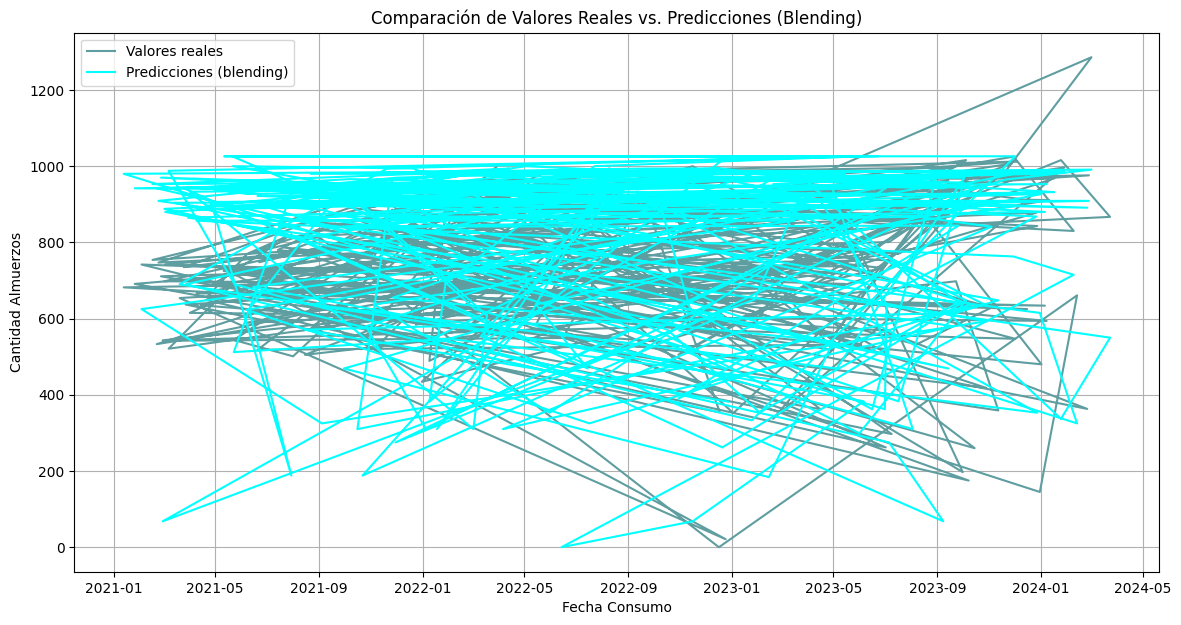

In [219]:
# Convertir y_test a DataFrame
y_test_df = pd.DataFrame(y_test, index=X_test.index, columns=['Cantidad Almuerzos'])

#Calculamos el error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, PredModFinalBlending_train)
mse_test = mean_squared_error(y_test, PredModFinalBlending_test)

print(f"MSE en entrenamiento: {mse_train}")
print(f"MSE en prueba: {mse_test}")

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(y_test_df.index, y_test_df['Cantidad Almuerzos'], label='Valores reales', color='cadetblue')
plt.plot(y_test_df.index, PredModFinalBlending_test, label='Predicciones (blending)', color='cyan')
plt.title('Comparación de Valores Reales vs. Predicciones (Blending)')
plt.xlabel('Fecha Consumo')
plt.ylabel('Cantidad Almuerzos')
plt.legend()
plt.grid(True)
plt.show()



---

# 🆎 **Algoritmos basados en Bagging y Boosting**


---

In [220]:
#Antes de iniciar con nuestro modelo SVM preparamos los datos
dfAlmuerzoAgrupado1 = dfAlmuerzoAgrupado

#Separamos las variables exógenas (X) de la endógena (y)
X = dfAlmuerzoAgrupado1[['Tipo Empleado_Administrativo', 'Tipo Empleado_Aprendices', 'Tipo Empleado_Operativo','Porcentaje apoyo_0','Porcentaje apoyo_30','Porcentaje apoyo_90','Porcentaje apoyo_100']]
y = dfAlmuerzoAgrupado1['Cantidad Almuerzos']

#Dividimos nuestros datos en entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create dummies
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)



---

🔰 **BAGGING**


---



In [221]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

NameError: name 'BaggingRegressor' is not defined



---

🔰 **BOOSTING**


---




---

🌘 **Algoritmo ADABOOST**


---

In [222]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9722038429030467


---

🌘 **Algoritmo GRADIENT BOOSTING (GBM)**


---

In [223]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9966553927250209


---

🌘 **Algoritmo XGBOOST**


---

In [224]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9951969235689581


---

🌘 **Algoritmo LIGHT GBM**


---

In [225]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
y_pred=model.predict(X_test)
rmse=mean_squared_error(y_pred,y_test)**0.5

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1257
[LightGBM] [Info] Number of data points in the train set: 947, number of used features: 7
[LightGBM] [Info] Start training from score 749.256600


---

🌘 **Algoritmo CATBOOST**


---

In [226]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor
model=CatBoostRegressor()
categorical_features_indices = np.where(dfAlmuerzoAgrupado1.dtypes != np.float64)[0]
model.fit(X_train,y_train,cat_features=([categorical_features_indices]),eval_set=(X_test, y_test))
model.score(X_test,y_test)

# **Creo que este entrenamiento de SARIMAX hay que borrarlo, no?**

In [ ]:
import statsmodels.api as sm

# Definición de los parámetros del modelo SARIMAX
p, d, q = 1, 2, 1
P, D, Q, s = 1, 1, 1, 12

# Entrenamiento del modelo SARIMAX
Modelo_SARIMAX = sm.tsa.SARIMAX(train_endog, exog=train_exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
Resultados_SARIMAX = Modelo_SARIMAX.fit()

# Predicciones con el modelo SARIMAX
Fecha_Inicio = test_endog.index[0]
Fecha_Fin = test_endog.index[-1]
Prediccion_SARIMAX = Resultados_SARIMAX.get_prediction(start=Fecha_Inicio, end=Fecha_Fin, exog=test_exog)
Prediccion_Final_SARIMAX = Prediccion_SARIMAX.predicted_mean
Prediccion_CI_SARIMAX = Prediccion_SARIMAX.conf_int()

# DataFrame comparativo
dfComparativoPredSARIMAX = pd.concat([test_endog, Prediccion_Final_SARIMAX], axis=1)
dfComparativoPredSARIMAX.columns = ['Real', 'Predicción']
print("******************************************************")
print("Las predicciones generadas con el modelo SARIMAX son:")
print("******************************************************")
print(dfComparativoPredSARIMAX)

# Graficación de resultados
plt.figure(figsize=(12, 6))
plt.plot(train_endog, label='Entrenamiento', color='paleturquoise')
plt.plot(test_endog, label='Pruebas', color='black')
plt.plot(Prediccion_Final_SARIMAX, label='Predicciones', color='palegreen')
plt.fill_between(Prediccion_CI_SARIMAX.index, Prediccion_CI_SARIMAX.iloc[:, 0], Prediccion_CI_SARIMAX.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Fecha Consumo')
plt.ylabel('Cantidad Almuerzos')
plt.legend()
plt.show()

# Cálculo de métricas para SARIMAX
MAE_SARIMAX = mean_absolute_error(test_endog, Prediccion_Final_SARIMAX)
Pesos = np.ones_like(test_endog)
absolute_errors = np.abs(Prediccion_Final_SARIMAX - test_endog)
WMAE_SARIMAX = np.sum(Pesos * absolute_errors) / np.sum(Pesos)
MBE_SARIMAX = (Prediccion_Final_SARIMAX - test_endog).mean()

print(f'**********************************************')
print(f'Métricas para el modelo SARIMAX:')
print(f'**********************************************')
print(f'MAE: {MAE_SARIMAX}')
print(f'WMAE: {WMAE_SARIMAX}')
print(f'MBE: {MBE_SARIMAX}')


---

#  **Generación de gráficos**

### **Generación de gráficos de residuos para los modelos SARIMAX, SVM y el modelo de ensamble.**

---

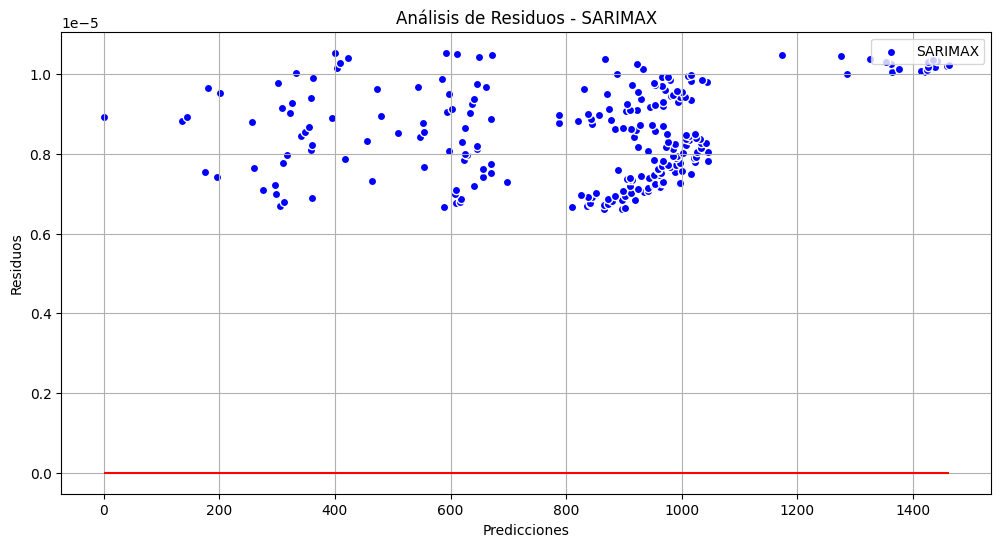

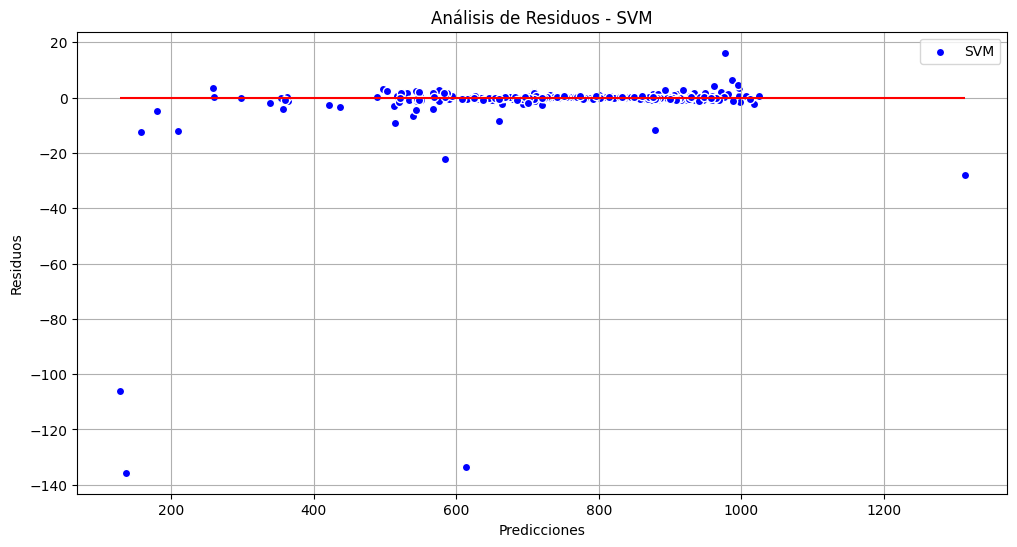

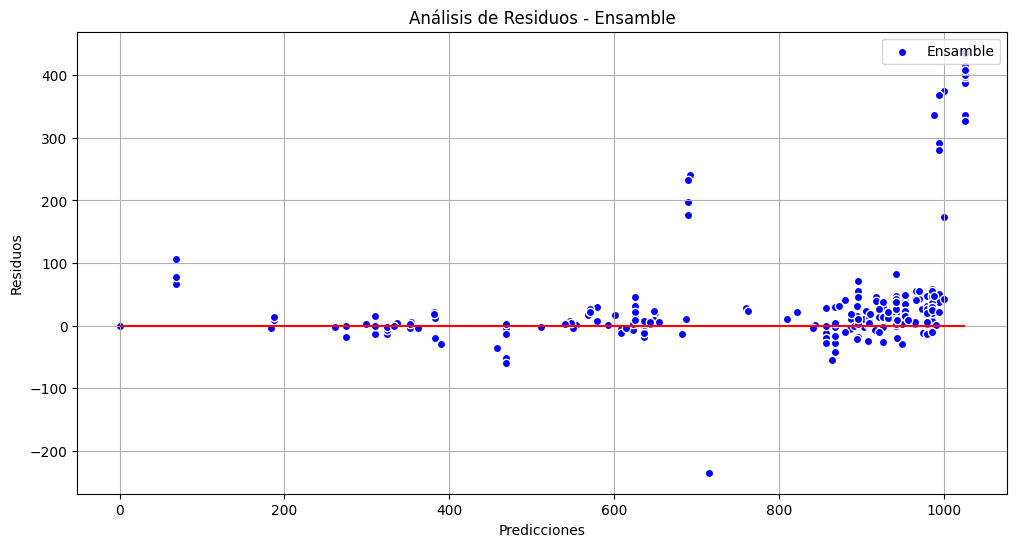

In [228]:
# Gráfico de residuos para SARIMAX
plt.figure(figsize=(12, 6))
plt.scatter(Prediccion_Final_SARIMAX, residuos_sarimax, c='blue', marker='o', edgecolor='white', label='SARIMAX')
plt.hlines(y=0, xmin=min(Prediccion_Final_SARIMAX), xmax=max(Prediccion_Final_SARIMAX), color='red')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos - SARIMAX')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Gráfico de residuos para SVM
plt.figure(figsize=(12, 6))
plt.scatter(Predicciones_SVM, residuos_svm, c='blue', marker='o', edgecolor='white', label='SVM')
plt.hlines(y=0, xmin=min(Predicciones_SVM), xmax=max(Predicciones_SVM), color='red')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos - SVM')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Gráfico de residuos para el modelo de ensamble
plt.figure(figsize=(12, 6))
plt.scatter(PredModFinalBlending_test, residuos_ensamble, c='blue', marker='o', edgecolor='white', label='Ensamble')
plt.hlines(y=0, xmin=min(PredModFinalBlending_test), xmax=max(PredModFinalBlending_test), color='red')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos - Ensamble')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Conslusiones Análisis de Residuos

Los residuos son la diferencia entre el valor real y la predicción del modelo. En un **análisis de residuos**, cada punto en el gráfico representa un residuo para una observación en el conjunto de datos de prueba. El eje Y muestra la magnitud de estos residuos. De acuerdo con los gráficos anteriores se obtienens las siguientes conclusiones del *Residuo = Valor Real - Predicción del Modelo* para para determinar el mejor modelo:

*   **SARIMAX:** Presenta residuos con una tendencia ascendente en las predicciones altas, lo cual sugiere que el modelo **indica un posible error sistemático y dificultades para capturar ciertas variaciones**.
*   **SVM:** Presenta residuos mayormente dispersos alrededor de cero, aunque con algunos valores atípicos, muestra un mejor ajuste general comparado con SARIMAX.

*   **Ensamble:** Presenta una alta variabilidad en los residuos, especialmente en las predicciones altas, lo cual indica que dificultades para capturar la relación subyacente en los datos. El modelo de ensamble (Blending) no logra mejorar significativamente sobre los modelos base, mostrando una gran variabilidad en las predicciones. El modelo de ensamble no logra mejorar significativamente sobre los modelos base, mostrando una gran variabilidad en las predicciones.

### **Generación de Gráfico de Tendencia y Predicción.**

Estos gráficos permiten visualizar la precisión de las predicciones en relación con los valores reales, lo que ayuda a identificar qué tan bien los modelos están capturando la tendencia y variaciones en los datos.

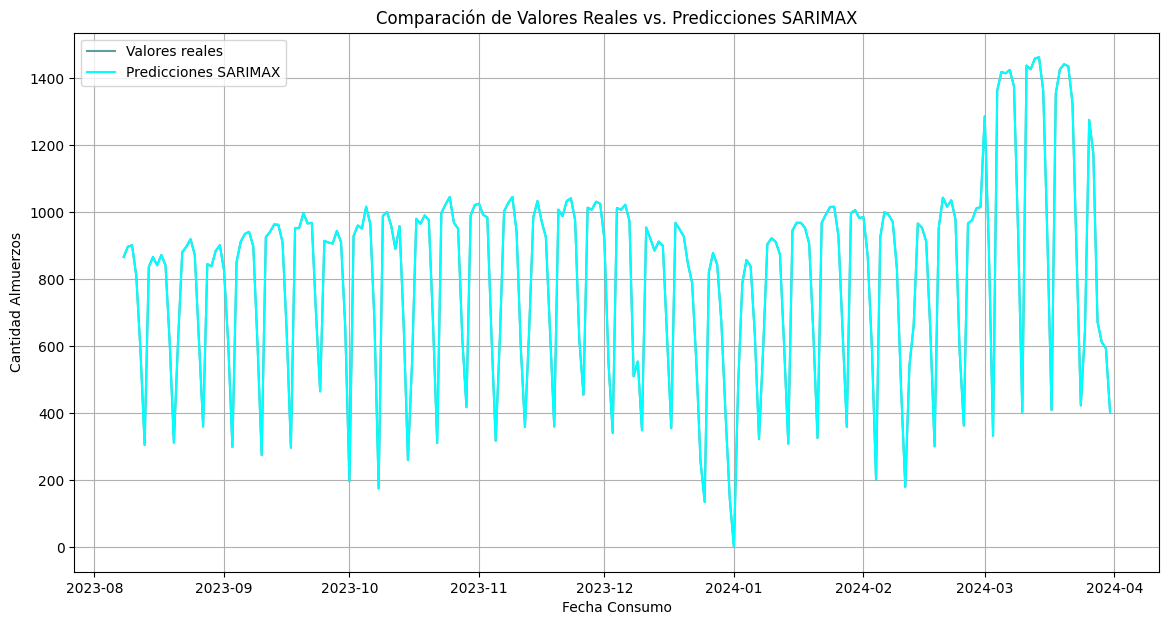

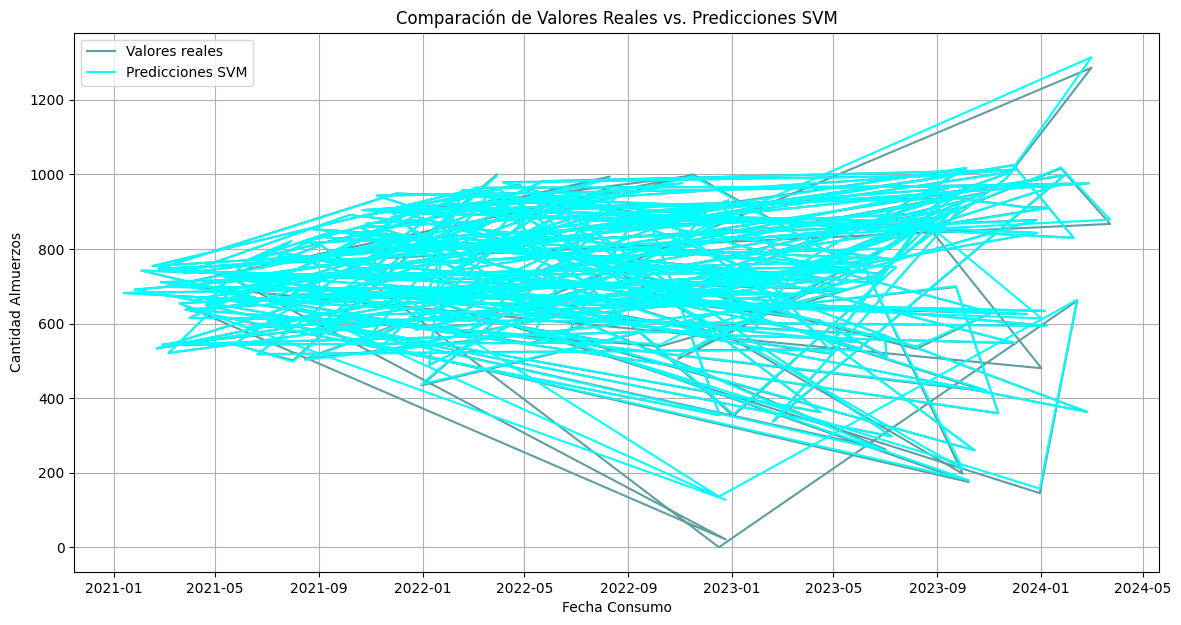

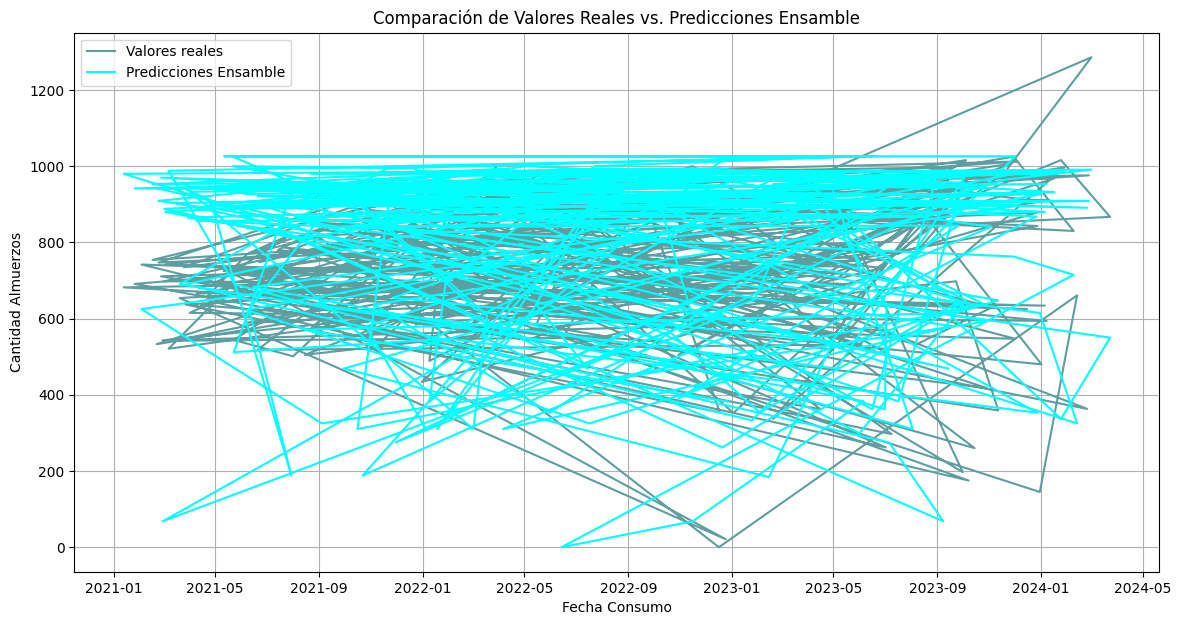

In [229]:
# Gráfico de tendencia y predicción para SARIMAX
plt.figure(figsize=(14, 7))
plt.plot(test_endog.index, test_endog, label='Valores reales', color='cadetblue')
plt.plot(test_endog.index, Prediccion_Final_SARIMAX, label='Predicciones SARIMAX', color='cyan')
plt.title('Comparación de Valores Reales vs. Predicciones SARIMAX')
plt.xlabel('Fecha Consumo')
plt.ylabel('Cantidad Almuerzos')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de tendencia y predicción para SVM
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Valores reales', color='cadetblue')
plt.plot(y_test.index, Predicciones_SVM, label='Predicciones SVM', color='cyan')
plt.title('Comparación de Valores Reales vs. Predicciones SVM')
plt.xlabel('Fecha Consumo')
plt.ylabel('Cantidad Almuerzos')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de tendencia y predicción para el modelo de ensamble
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Valores reales', color='cadetblue')
plt.plot(y_test.index, PredModFinalBlending_test, label='Predicciones Ensamble', color='cyan')
plt.title('Comparación de Valores Reales vs. Predicciones Ensamble')
plt.xlabel('Fecha Consumo')
plt.ylabel('Cantidad Almuerzos')
plt.legend()
plt.grid(True)
plt.show()


## Conslusiones Gráficos de Tendencia y Predicción:

*   **SARIMAX:** Las predicciones del modelo SARIMAX siguen de cerca la tendencia de los valores reales y capturan las fluctuaciones diarias y las tendencias generales. El modelo SARIMAX es capaz de capturar la tendencia general y las variaciones estacionales en los datos de demanda de almuerzos, aunque tiene algunas discrepancias en ciertas áreas. A pesar de estos problemas, ofrece una buena aproximación en términos de tendencia general.

*   **SVM:** Las predicciones del modelo SVM muestran un patrón errático y no siguen de cerca los valores reales. Las líneas desordenadas indican predicciones muy divergentes de los valores reales. El gráfico de tendencia y predicción del modelo SVM indica un desempeño pobre en capturar la tendencia general de los datos. Este comportamiento sugiere que el modelo SVM no está capturando adecuadamente la demanda de almuerzos, y muestra una alta variabilidad en las predicciones.

*   **Ensamble:** Similar al modelo SVM, las predicciones del modelo de ensamble muestran un patrón errático y no siguen de cerca los valores reales. Hay una alta variabilidad en las predicciones. El modelo de ensamble no mejora significativamente sobre el modelo SVM y muestra una alta variabilidad en las predicciones. Esto sugiere que el modelo de ensamble no es adecuado para la predicción de la demanda de almuerzos en este caso.

## **Combinación de Análisis de Residuos y Tendencias**

En la evaluación anterior, el análisis de residuos sugería que el modelo SVM tenía un mejor ajuste general, mientras que el gráfico de tendencia y predicción mostró un desempeño pobre. La inconsistencia podría deberse a diferentes aspectos que los residuos y las predicciones están reflejando. A continuación, se proporciona un análisis integrado de los dos tipos de gráficos:

**Modelo SARIMAX:**

- Residuos: Tendencia ascendente y error sistemático.
- Tendencia y Predicción: Buen ajuste general y captura de variaciones estacionales.
- Conclusión: A pesar de algunos problemas con los residuos, el modelo SARIMAX captura bien las tendencias generales y estacionales. Es una opción sólida para predecir la demanda de almuerzos.

**Modelo SVM:**

- Residuos: Mejor ajuste general, pero con algunos valores atípicos.
- Tendencia y Predicción: Patrón errático y no sigue de cerca los valores reales.
- Conclusión: Aunque los residuos indican un buen ajuste general, las predicciones muestran un desempeño inconsistente. Esto sugiere que el modelo SVM puede ser inadecuado para este tipo de datos sin ajustes adicionales.

**Modelo de Ensamble:**

- Residuos: Alta variabilidad.
- Tendencia y Predicción: Alta variabilidad y no mejora significativamente sobre los modelos individuales.
- Conclusión: El modelo de ensamble no mejora significativamente sobre los modelos base y muestra alta variabilidad en las predicciones, por lo que no es adecuado para esta tarea.

**Recomendación Final**

**Modelo SARIMAX:**

Captura bien la tendencia general y las variaciones estacionales en los datos de demanda de almuerzos. A pesar de algunos problemas en los residuos, el desempeño general en términos de tendencia es superior.